<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/weather_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks - Weather AUS

### Matheus RA: 16.00177-0

# Import libraries

In [ ]:
#Biblioteca para facilitar a separação dos dataset em dados de traino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#Pandas é uma biblioteca que facilita a ingestão e manipulação de dados
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

#TensorFlow
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential


#enabling to plot using plotlib in the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/weatherAUS.csv')

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.drop( ['RISK_MM'], axis = 1, inplace = True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(142193, 23)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [ ]:
df.describe( include='all' )

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,138415,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2014-06-22,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,10663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,NaN,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,NaN,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,NaN


# 1º try

In this case we dropped every feature that most of it's values are NaN. 

In [ ]:
df1 = df.drop(labels = ['Date','Location','Evaporation','Sunshine','Cloud3pm','Cloud9am'] ,axis = 1 )

In [ ]:
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df1['RainToday'] = df1['RainToday'].map( { 'No':0 , 'Yes':1 } )
df1['RainTomorrow'] = df1['RainTomorrow'].map( { 'No':0 , 'Yes':1 } )


df1.shape

(142193, 17)

In [ ]:
df1.dropna(inplace = True)

In [ ]:
df1.shape

(112925, 17)

## Defining the Categorical Using One Hot Enconding

In [ ]:
categorical = ['WindGustDir','WindDir9am','WindDir3pm']

In [ ]:
df1 = pd.get_dummies( df1,columns = categorical,drop_first=True )

In [ ]:
df1.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x = df1.drop(labels = ['RainTomorrow'],axis = 1)
x.shape

(112925, 58)

In [ ]:
y = df1['RainTomorrow']

In [ ]:
x = sc.fit_transform(x)
x

array([[ 0.11756741, -0.10822071, -0.20666127, ..., -0.27515781,
         3.90999267, -0.27186642],
       [-0.84180219,  0.20684494, -0.27640495, ..., -0.27515781,
        -0.25575496,  3.67827705],
       [ 0.03761995,  0.29277194, -0.27640495, ..., -0.27515781,
        -0.25575496,  3.67827705],
       ...,
       [-1.44940294,  0.23548728, -0.27640495, ..., -0.27515781,
        -0.25575496, -0.27186642],
       [-1.16159206,  0.46462594, -0.27640495, ..., -0.27515781,
         3.90999267, -0.27186642],
       [-0.77784422,  0.4789471 , -0.27640495, ..., -0.27515781,
        -0.25575496, -0.27186642]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 40 )

## Training values with Neural Network

In [ ]:
classifier1 = Sequential([
                         Dense( units = 30, activation = 'relu', input_dim = 58 ),
                         Dense( units = 30, activation = 'relu' ),
                         Dense( units = 30, activation = 'relu' ),
                         Dense( units = 1, activation='sigmoid' ) 
                         
])

In [ ]:
classifier1.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
classifier1.fit( x_train, y_train,epochs = 30, batch_size = 100 )

Epoch 1/30
90340/90340 [==============================] - 5s 58us/step - loss: 0.3803 - accuracy: 0.8319
Epoch 2/30
90340/90340 [==============================] - 5s 54us/step - loss: 0.3437 - accuracy: 0.8518
Epoch 3/30
90340/90340 [==============================] - 5s 53us/step - loss: 0.3376 - accuracy: 0.8537
Epoch 4/30
90340/90340 [==============================] - 4s 49us/step - loss: 0.3334 - accuracy: 0.8560
Epoch 5/30
90340/90340 [==============================] - 4s 47us/step - loss: 0.3303 - accuracy: 0.8576
Epoch 6/30
90340/90340 [==============================] - 4s 46us/step - loss: 0.3278 - accuracy: 0.8577
Epoch 7/30
90340/90340 [==============================] - 4s 46us/step - loss: 0.3254 - accuracy: 0.8594
Epoch 8/30
90340/90340 [==============================] - 4s 46us/step - loss: 0.3237 - accuracy: 0.8596
Epoch 9/30
90340/90340 [==============================] - 4s 46us/step - loss: 0.3224 - accuracy: 0.8604
Epoch 10/30
90340/90340 [==============================

In [ ]:
y_pred = classifier1.predict_classes(x_test)
y_train_pred = classifier1.predict_classes(x_train)

In [ ]:
print('Training Accuracy: ', accuracy_score(y_train,y_train_pred) )
print('Testing Accuracy: ', accuracy_score(y_test,y_pred) )

Training Accuracy:  0.8695373035200354
Testing Accuracy:  0.8497675448306398


# 2º Try

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
df2 = df.copy()
df2.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [ ]:
df2['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = pd.to_numeric(df2['Date'])

## Redefining data

In [ ]:
df2['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [ ]:
df2['WindGustDir'] = df2['WindGustDir'].map( {'W' : 0, 'WNW' : 1, 'WSW' : 2, 'NE': 3,
                                    'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 
                                    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 
                                    'E': 14, 'SSW': 15})

In [ ]:
df2['WindGustDir'].isna().sum()
df2['WindGustDir'].fillna( value = df2['WindGustDir'].mean(), inplace = True )

In [ ]:
df2['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [ ]:
df2['WindDir9am'] = df2['WindDir9am'].map( {'W' : 0, 'WNW' : 1, 'WSW' : 2, 'NE': 3,
                                    'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 
                                    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 
                                    'E': 14, 'SSW': 15})

In [ ]:
df2['WindDir9am'].isna().sum()

10013

In [ ]:
df2['WindDir9am'].fillna( value = df2['WindDir9am'].mean(), inplace = True )

In [ ]:
df2['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [ ]:
df2['WindDir3pm'] = df2['WindDir3pm'].map( {'W' : 0, 'WNW' : 1, 'WSW' : 2, 'NE': 3,
                                    'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 
                                    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 
                                    'E': 14, 'SSW': 15})

In [ ]:
df2['WindDir3pm'].isna().sum()

3778

In [ ]:
df2['WindDir3pm'].fillna( value = df2['WindDir3pm'].mean(), inplace = True )

In [ ]:
df2['Location'] = df2['Location'].map( {'Albury': 0, 'BadgerysCreek': 1, 
       'Newcastle': 2, 'NorahHead': 3, 'NorfolkIsland': 4, 'Penrith': 5, 'Richmond': 6,
       'Sydney': 7, 'SydneyAirport': 8, 'WaggaWagga': 9, 'Williamtown': 10,
       'Wollongong': 11, 'Canberra': 12, 'Tuggeranong': 13, 'MountGinini': 15, 'Ballarat': 16,
       'Bendigo': 17, 'Sale': 18, 'MelbourneAirport': 19, 'Melbourne': 20, 'Mildura': 21,
       'Nhil': 22, 'Portland': 23, 'Watsonia': 24, 'Dartmoor': 25, 'Brisbane': 26, 'Cairns': 27,
       'GoldCoast': 28, 'Townsville': 29, 'Adelaide': 30, 'MountGambier': 31, 'Nuriootpa': 32,
       'Woomera': 33, 'Albany': 34, 'Witchcliffe': 35, 'PearceRAAF': 36, 'PerthAirport': 37,
       'Perth': 38, 'SalmonGums': 39, 'Walpole': 40, 'Hobart': 41, 'Launceston': 42,
       'AliceSprings': 43, 'Darwin': 44, 'Katherine': 45, 'Uluru': 46, 'Cobar': 47, 'CoffsHarbour': 48,
       'Moree': 49})

In [ ]:
df2['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df2['RainToday'] = df2['RainToday'].map( {'No': 0, 'Yes': 1})

In [ ]:
df2['RainToday'].fillna( value = df2['RainToday'].mean(), inplace = True )

In [ ]:
df2['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df2['RainTomorrow'] = df2['RainTomorrow'].map( {'No': 0, 'Yes': 1})

In [ ]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1228089600000000000,0,13.4,22.9,0.6,NaN,NaN,0.0,44.0,0.0,1.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,1228176000000000000,0,7.4,25.1,0.0,NaN,NaN,1.0,44.0,4.0,2.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,1228262400000000000,0,12.9,25.7,0.0,NaN,NaN,2.0,46.0,0.0,2.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,1228348800000000000,0,9.2,28.0,0.0,NaN,NaN,3.0,24.0,12.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,1228435200000000000,0,17.5,32.3,1.0,NaN,NaN,0.0,41.0,8.0,11.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


## Let's try to fill all null values with it's column's mean

In [ ]:
mean = { 'MinTemp': df2['MinTemp'].mean(), 'MaxTemp': df2['MaxTemp'].mean(), 
        'Rainfall': df2['Rainfall'].mean(), 'Evaporation': df2['Evaporation'].mean(),
        'WindGustDir': df2['WindGustDir'].mean(),'Sunshine': df2['Sunshine'].mean(),
        'WindGustSpeed': df2['WindGustSpeed'].mean(),'WindSpeed9am': df2['WindSpeed9am'].mean(),
        'WindSpeed3pm': df2['WindSpeed3pm'].mean(),
        'Humidity9am': df2['Humidity9am'].mean(), 'Humidity3pm': df2['Humidity3pm'].mean(),
        'Pressure9am': df2['Pressure9am'].mean(), 'Pressure3pm': df2['Pressure3pm'].mean(),
        'Cloud9am': df2['Cloud9am'].mean(), 'Cloud3pm': df2['Cloud3pm'].mean(), 
        'Temp9am': df2['Temp9am'].mean(),'Temp3pm': df2['Temp3pm'].mean()
      }

mean

{'Cloud3pm': 4.503166899728551,
 'Cloud9am': 4.437189391885787,
 'Evaporation': 5.469824216349123,
 'Humidity3pm': 51.482606091656265,
 'Humidity9am': 68.8438103105705,
 'MaxTemp': 23.226784191272444,
 'MinTemp': 12.186399728729098,
 'Pressure3pm': 1015.258203537907,
 'Pressure9am': 1017.6537584159781,
 'Rainfall': 2.3499740743111954,
 'Sunshine': 7.624853113193571,
 'Temp3pm': 21.68723497314744,
 'Temp9am': 16.98750858170133,
 'WindGustDir': 7.555504542273637,
 'WindGustSpeed': 39.98429165757619,
 'WindSpeed3pm': 18.63757586179718,
 'WindSpeed9am': 14.001988000994}

In [ ]:
df2.fillna( value = mean, inplace = True )

In [ ]:
df2.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
x = df2.drop(labels = ['RainTomorrow'],axis = 1)

In [ ]:
y = df2['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2, random_state = 42 )

In [ ]:
x_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
17969,1255478400000000000,3,15.1,23.9,0.0,5.469824,7.624853,15.0,67.0,11.0,0.0,19.0,22.0,38.0,68.0,1001.9,1002.4,4.437189,4.503167,19.8,14.3,0.0
124769,1316995200000000000,40,9.7,14.2,7.6,5.469824,7.624853,2.0,50.0,1.0,0.0,15.0,28.0,91.0,56.0,1008.2,1007.7,4.437189,4.503167,11.1,13.4,1.0
39287,1271721600000000000,10,13.2,25.4,0.0,3.200000,8.800000,8.0,30.0,0.0,14.0,6.0,17.0,79.0,63.0,1025.2,1021.5,6.000000,5.000000,21.2,24.0,0.0
127749,1310428800000000000,41,7.6,14.8,0.0,4.000000,7.000000,1.0,94.0,1.0,1.0,30.0,35.0,52.0,45.0,1004.6,1001.4,4.437189,4.503167,11.1,12.9,0.0
40651,1428883200000000000,10,12.9,22.2,0.0,4.000000,7.900000,10.0,37.0,7.0,9.0,15.0,20.0,69.0,52.0,1023.0,1021.2,6.000000,2.000000,18.8,20.6,0.0


## Neural Network

In [ ]:
model = Sequential([
                    Dense( units = 60, activation = 'relu', input_shape = (22,)),
                    Dense( units = 60, activation = 'relu'),
                    Dense( units = 40, activation = 'relu'),
                    Dense( units = 40, activation = 'relu'),
                    Dense( units = 1, activation = 'sigmoid' )
])

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
historico = model.fit(x_train.values, y_train.values, validation_data = ( x_test.values, y_test.values ), batch_size = 100, epochs = 20)

## Verifying underfitting or overfitting

In [ ]:
plt.plot( historico.history['loss'], label= 'Training' )
plt.plot( historico.history['val_loss'], label= 'Validation' )
plt.legend()


# 3º Try

## Let's try to fill all null values with it's column's median

In [60]:
df3 = df.copy()
df3.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [61]:
df3['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [62]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3['Date'] = pd.to_numeric(df3['Date'])

In [63]:
df3['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [64]:
df3['WindGustDir'] = df3['WindGustDir'].map( {'W' : 0, 'WNW' : 1, 'WSW' : 2, 'NE': 3,
                                    'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 
                                    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 
                                    'E': 14, 'SSW': 15})

df3['WindGustDir'].fillna( value = df3['WindGustDir'].mean(), inplace = True )

df3['WindDir9am'] = df3['WindDir9am'].map( {'W' : 0, 'WNW' : 1, 'WSW' : 2, 'NE': 3,
                                    'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 
                                    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 
                                    'E': 14, 'SSW': 15})

df3['WindDir9am'].fillna( value = df3['WindDir9am'].mean(), inplace = True )



df3['WindDir3pm'] = df3['WindDir3pm'].map( {'W' : 0, 'WNW' : 1, 'WSW' : 2, 'NE': 3,
                                    'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 
                                    'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 
                                    'E': 14, 'SSW': 15})

df2['WindDir3pm'].fillna( value = df2['WindDir3pm'].mean(), inplace = True )


df3['Location'] = df3['Location'].map( {'Albury': 0, 'BadgerysCreek': 1, 
       'Newcastle': 2, 'NorahHead': 3, 'NorfolkIsland': 4, 'Penrith': 5, 'Richmond': 6,
       'Sydney': 7, 'SydneyAirport': 8, 'WaggaWagga': 9, 'Williamtown': 10,
       'Wollongong': 11, 'Canberra': 12, 'Tuggeranong': 13, 'MountGinini': 15, 'Ballarat': 16,
       'Bendigo': 17, 'Sale': 18, 'MelbourneAirport': 19, 'Melbourne': 20, 'Mildura': 21,
       'Nhil': 22, 'Portland': 23, 'Watsonia': 24, 'Dartmoor': 25, 'Brisbane': 26, 'Cairns': 27,
       'GoldCoast': 28, 'Townsville': 29, 'Adelaide': 30, 'MountGambier': 31, 'Nuriootpa': 32,
       'Woomera': 33, 'Albany': 34, 'Witchcliffe': 35, 'PearceRAAF': 36, 'PerthAirport': 37,
       'Perth': 38, 'SalmonGums': 39, 'Walpole': 40, 'Hobart': 41, 'Launceston': 42,
       'AliceSprings': 43, 'Darwin': 44, 'Katherine': 45, 'Uluru': 46, 'Cobar': 47, 'CoffsHarbour': 48,
       'Moree': 49})

df3['RainToday'] = df3['RainToday'].map( {'No': 0, 'Yes': 1})
df3['RainToday'].fillna( value = df3['RainToday'].mean(), inplace = True )

df3['RainTomorrow'] = df3['RainTomorrow'].map( {'No': 0, 'Yes': 1})

In [65]:
mean

{'Cloud3pm': 4.503166899728551,
 'Cloud9am': 4.437189391885787,
 'Evaporation': 5.469824216349123,
 'Humidity3pm': 51.482606091656265,
 'Humidity9am': 68.8438103105705,
 'MaxTemp': 23.226784191272444,
 'MinTemp': 12.186399728729098,
 'Pressure3pm': 1015.258203537907,
 'Pressure9am': 1017.6537584159781,
 'Rainfall': 2.3499740743111954,
 'Sunshine': 7.624853113193571,
 'Temp3pm': 21.68723497314744,
 'Temp9am': 16.98750858170133,
 'WindGustDir': 7.555504542273637,
 'WindGustSpeed': 39.98429165757619,
 'WindSpeed3pm': 18.63757586179718,
 'WindSpeed9am': 14.001988000994}

In [66]:
median = { 'MinTemp': df3['MinTemp'].median(), 'MaxTemp': df3['MaxTemp'].median(), 
        'Rainfall': df3['Rainfall'].median(), 'Evaporation': df3['Evaporation'].median(),
        'WindGustDir': df3['WindGustDir'].median(),'Sunshine': df3['Sunshine'].median(),
        'WindGustSpeed': df3['WindGustSpeed'].median(),'WindSpeed9am': df3['WindSpeed9am'].median(), 'WindSpeed3pm': df3['WindSpeed3pm'].median(),
        'Humidity9am': df3['Humidity9am'].median(), 'Humidity3pm': df3['Humidity3pm'].median(),
        'Pressure9am': df3['Pressure9am'].median(), 'Pressure3pm': df3['Pressure3pm'].median(),
        'Cloud9am': df3['Cloud9am'].median(), 'Cloud3pm': df3['Cloud3pm'].median(), 
        'Temp9am': df3['Temp9am'].median(),'Temp3pm': df3['Temp3pm'].median()
      }

median

{'Cloud3pm': 5.0,
 'Cloud9am': 5.0,
 'Evaporation': 4.8,
 'Humidity3pm': 52.0,
 'Humidity9am': 70.0,
 'MaxTemp': 22.6,
 'MinTemp': 12.0,
 'Pressure3pm': 1015.2,
 'Pressure9am': 1017.6,
 'Rainfall': 0.0,
 'Sunshine': 8.5,
 'Temp3pm': 21.1,
 'Temp9am': 16.7,
 'WindGustDir': 7.5555045422728675,
 'WindGustSpeed': 39.0,
 'WindSpeed3pm': 19.0,
 'WindSpeed9am': 13.0}

### Alanizing the mean the median values, it's clear that the values don't change that much, so, i assume that the final result won't change either. 

In [67]:
df3.fillna( value = median, inplace = True )

In [68]:
df3.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1228089600000000000,0,13.4,22.9,0.6,4.8,8.5,0.0,44.0,0.0,1.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,0
1,1228176000000000000,0,7.4,25.1,0.0,4.8,8.5,1.0,44.0,4.0,2.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,0
2,1228262400000000000,0,12.9,25.7,0.0,4.8,8.5,2.0,46.0,0.0,2.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,0
3,1228348800000000000,0,9.2,28.0,0.0,4.8,8.5,3.0,24.0,12.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,0
4,1228435200000000000,0,17.5,32.3,1.0,4.8,8.5,0.0,41.0,8.0,11.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


In [69]:
x = df3.drop(labels = ['RainTomorrow'],axis = 1)
y = df3['RainTomorrow']

In [70]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 56 )

In [71]:
x.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1228089600000000000,0,13.4,22.9,0.6,4.8,8.5,0.0,44.0,0.0,1.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0
1,1228176000000000000,0,7.4,25.1,0.0,4.8,8.5,1.0,44.0,4.0,2.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0
2,1228262400000000000,0,12.9,25.7,0.0,4.8,8.5,2.0,46.0,0.0,2.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0
3,1228348800000000000,0,9.2,28.0,0.0,4.8,8.5,3.0,24.0,12.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0
4,1228435200000000000,0,17.5,32.3,1.0,4.8,8.5,0.0,41.0,8.0,11.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


## Neural Network

In [72]:
model = Sequential([
                    Dense( units = 30, activation = 'relu', input_shape = (22,)),
                    Dense( units = 30, activation = 'relu'),
                    Dense( units = 1, activation = 'sigmoid' )
])

In [73]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
historico = model.fit(x_train.values, y_train.values, validation_data = ( x_test.values, y_test.values ), batch_size = 100, epochs = 20)

Train on 99535 samples, validate on 42658 samples
Epoch 1/20
99535/99535 [==============================] - 6s 61us/step - loss: 307513703649169.9375 - accuracy: 0.7764 - val_loss: 0.5352 - val_accuracy: 0.7738
Epoch 2/20
99535/99535 [==============================] - 5s 53us/step - loss: 0.5312 - accuracy: 0.7767 - val_loss: 0.5347 - val_accuracy: 0.7738
Epoch 3/20
99535/99535 [==============================] - 5s 55us/step - loss: 0.5311 - accuracy: 0.7767 - val_loss: 0.5347 - val_accuracy: 0.7738
Epoch 4/20
99535/99535 [==============================] - 5s 53us/step - loss: 0.5311 - accuracy: 0.7767 - val_loss: 0.5348 - val_accuracy: 0.7738
Epoch 5/20
99535/99535 [==============================] - 5s 52us/step - loss: 0.5311 - accuracy: 0.7767 - val_loss: 0.5347 - val_accuracy: 0.7738
Epoch 6/20
99535/99535 [==============================] - 5s 52us/step - loss: 0.5311 - accuracy: 0.7767 - val_loss: 0.5347 - val_accuracy: 0.7738
Epoch 7/20
99535/99535 [==============================

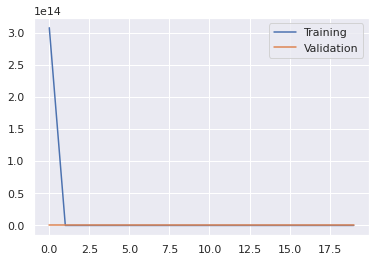

In [74]:
plt.plot( historico.history['loss'], label = 'Training' )
plt.plot( historico.history['val_loss'], label = 'Validation' )
plt.legend()

# 4º Try

In [135]:
df4 = df.copy()
df4.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [136]:
df4['RainToday'] = df4['RainToday'].map( {'No': 0, 'Yes': 1})
df4['RainTomorrow'] = df4['RainTomorrow'].map( {'No': 0, 'Yes': 1})

In [137]:
df4['Location'] = df4['Location'].map({'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4,
       'Newcastle':5, 'NorahHead':6, 'NorfolkIsland':7, 'Penrith':8, 'Richmond':9,
       'Sydney':10, 'SydneyAirport':11, 'WaggaWagga':12, 'Williamtown':13,
       'Wollongong':14, 'Canberra':15, 'Tuggeranong':16, 'MountGinini':17, 'Ballarat':18,
       'Bendigo':19, 'Sale':20, 'MelbourneAirport':21, 'Melbourne':22, 'Mildura':23,
       'Nhil':24, 'Portland':25, 'Watsonia':26, 'Dartmoor':27, 'Brisbane':28, 'Cairns':29,
       'GoldCoast':30, 'Townsville':31, 'Adelaide':32, 'MountGambier':33, 'Nuriootpa':34,
       'Woomera':35, 'Albany':36, 'Witchcliffe':37, 'PearceRAAF':38, 'PerthAirport':39,
       'Perth':40, 'SalmonGums':41, 'Walpole':42, 'Hobart':43, 'Launceston':44,
       'AliceSprings':45, 'Darwin':46, 'Katherine':47, 'Uluru':48})

df4['WindGustDir'] = df4['WindGustDir'].map({'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9,
       'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15})

df4['WindDir9am'] = df4['WindDir9am'].map({'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9,
       'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15})

df4['WindDir3pm'] = df4['WindDir3pm'].map({'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9,
       'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15})

df4['RainToday']=df4['RainToday'].map({'No':0, 'Yes':1})

In [138]:
df4['month'] = df4['Date'].map(lambda x: x.split('-')[1])
df4['month']

0         12
1         12
2         12
3         12
4         12
          ..
142188    06
142189    06
142190    06
142191    06
142192    06
Name: month, Length: 142193, dtype: object

In [139]:
df4['month'] = df4['month'].map(lambda x: int(x))

In [140]:
df4.loc[df4['month'] == 1]['Sunshine'].mean()

9.208941899604792

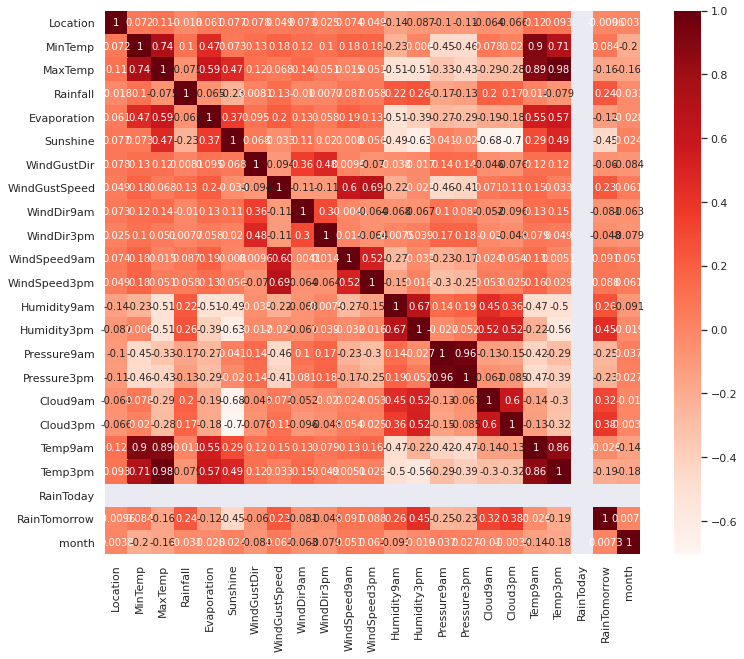

In [141]:
plt.figure(figsize=(12,10))
cor = df4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [142]:
df4.loc[df4['month'] == 1]['Sunshine'].unique()

array([ nan, 12.3, 13. , 13.3, 10.6, 12.2,  8.4,  0. , 12.6, 13.2, 12.7,
       12.1, 10.3, 13.1, 12.9, 11.3,  6.9, 10.9,  3.7,  5.9, 10.5, 12.4,
       13.4, 13.6,  2.2,  9.5,  7.4,  9.8, 11. , 12.5, 11.6, 11.4, 11.9,
       11.1, 12. , 12.8, 11.8,  6.4,  8.9,  8. ,  0.2,  1.9, 10.8,  0.3,
        2.8, 11.2,  3.6,  0.7,  9.9,  9.7, 10.4,  2.6,  2.4,  2.5,  8.1,
        7.1,  8.3,  5.3,  5.8,  5.4,  6.3,  6.7,  1.3,  5. ,  4.8,  6. ,
        0.9,  8.8, 10.7,  2.9,  4.5,  8.2,  8.7,  7.5,  9.3,  3.1,  9.2,
       10. ,  9. ,  6.1,  9.6,  9.1,  4.2,  1.5,  1.4,  0.1,  1.1,  5.5,
        7.6,  0.8,  9.4,  0.6,  3. , 11.7,  7.7,  6.8,  5.2,  6.5, 10.2,
       10.1,  7.3, 13.5,  1.7,  4.1,  7.9, 14. ,  1.8, 11.5,  1.2,  0.5,
        2.3,  4.6,  3.5,  3.2,  2. ,  5.1,  3.9,  8.6,  0.4,  6.2,  2.7,
        6.6,  4.3,  5.6,  4.7,  7. ,  4. ,  8.5,  7.8,  2.1,  7.2,  5.7,
        1.6,  3.4,  1. ,  3.3,  4.4, 13.7, 13.8,  4.9, 13.9,  3.8, 14.3,
       14.2])

In [143]:
df4['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [146]:
for i in df4['month'].unique():
  df4.loc[df4['month'] == i, 'Sunshine'] = df4.loc[df4['month'] == i]['Sunshine'].fillna(df4.loc[df4['month'] == i]['Sunshine'].mean())

In [154]:
x = df4.drop(labels = ['RainTomorrow','Date'],axis = 1)
y = df4['RainTomorrow']

In [155]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 42 )

In [164]:
model = Sequential([
                    Dense(units = 30, activation = 'relu', input_shape = (22,)),
                    Dense(units = 30, activation = 'relu'),
                    Dense(units = 1, activation = 'sigmoid')
])

In [165]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])
hist = model.fit(x_train.values, y_train.values, validation_data=(x_test.values, y_test.values), batch_size=150, epochs=15)

Train on 99535 samples, validate on 42658 samples
Epoch 1/15
99535/99535 [==============================] - 3s 34us/step - loss: 0.6193 - accuracy: 0.7754 - val_loss: 0.5647 - val_accuracy: 0.7767
Epoch 2/15
99535/99535 [==============================] - 3s 32us/step - loss: 0.5431 - accuracy: 0.7754 - val_loss: 0.5316 - val_accuracy: 0.7767
Epoch 3/15
99535/99535 [==============================] - 3s 33us/step - loss: 0.5327 - accuracy: 0.7754 - val_loss: 0.5311 - val_accuracy: 0.7767
Epoch 4/15
99535/99535 [==============================] - 3s 32us/step - loss: 0.5326 - accuracy: 0.7754 - val_loss: 0.5311 - val_accuracy: 0.7767
Epoch 5/15
99535/99535 [==============================] - 3s 32us/step - loss: 0.5326 - accuracy: 0.7754 - val_loss: 0.5310 - val_accuracy: 0.7767
Epoch 6/15
99535/99535 [==============================] - 3s 32us/step - loss: 0.5326 - accuracy: 0.7754 - val_loss: 0.5310 - val_accuracy: 0.7767
Epoch 7/15
99535/99535 [==============================] - 3s 32us/st

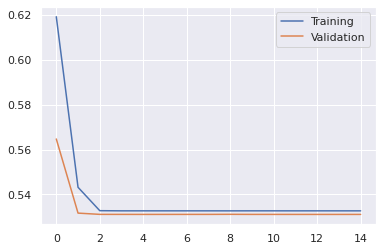

In [168]:
plt.plot( hist.history['loss'], label = 'Training' )
plt.plot( hist.history['val_loss'], label = 'Validation' )
plt.legend()

In [171]:
model.evaluate(x_test,y_test,batch_size=10)

42658/42658 [==============================] - 8s 184us/step


[0.5310397162635963, 0.7767124772071838]